# <h1><center>EDA Assignment</center></h1>  

## About the dataset

   This is a comprehensive dataset including numerous financial metrics that many professionals and investing gurus often use to value companies. This data is a look at the companies that comprise the S&P 500 (Standard & Poor's 500). 
   The S&P 500 is a capitalization-weighted index of the top 500 publicly traded companies in the United States (top 500 meaning the companies with the largest market cap). 
   The S&P 500 index is a useful index to study because it generally reflects the health of the overall U.S. stock market. The dataset was last updated in July 2020.

## Features and description


There are 14 columns included in this dataset:

 - __4 character variables__:
      - __Symbol__: Ticker symbol used to uniquely identify each company on a particular stock market
      - __Name__: Legal name of the company
      - __Sector__: An area of the economy where businesses share a related product or service
      - __SEC Filings__: Helpful documents relating to a company

 - __10 numeric variables__:
      - __Price__: Price per share of the company
      - __Price to Earnings (PE)__: The ratio of a company’s share price to its earnings per share
      - __Dividend Yield__: The ratio of the annual dividends per share divided by the price per share
      - __Earnings Per Share (EPS)__: A company’s profit divided by the number of shares of its stock
      - __52 week high and low__: The annual high and low of a company’s share price
      - __Market Cap__: The market value of a company’s shares (calculated as share price x number of shares)
      - __EBITDA__: A company’s earnings before interest, taxes, depreciation, and amortization; often used as a proxy for             its profitability
      - __Price to Sales (PS)__: A company’s market cap divided by its total sales or revenue over the past year
      - __Price to Book (PB)__: A company’s price per share divided by its book value

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

from plotly.offline import iplot,init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)
import seaborn as sns

### Reading the dataset

In [2]:
data=pd.read_csv('../Integrify/Data/financials.csv')

In [3]:
data.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [4]:
data.drop(columns='SEC Filings',inplace=True)

In [18]:
#data.drop(columns='Name',inplace=True)

In [4]:
data.rename(columns={'52 Week Low': '52 Week_High'}, inplace=True)


In [6]:
data.rename(columns={'52 Week High': '52 Week_Low'}, inplace=True)

### checking the shape of the data

In [8]:
data.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week_High,52 Week_Low,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [6]:
data.shape

(505, 13)

### checking the null values

In [7]:
data.isna().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
dtype: int64

In [ ]:
#msno.matrix(data)

<AxesSubplot:>

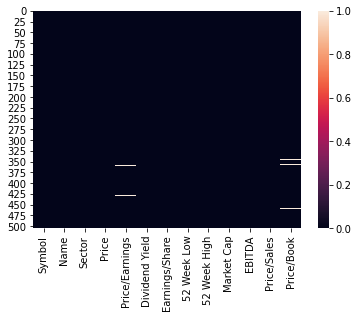

In [8]:
sns.heatmap(data.isna())

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week_High      0
52 Week_Low       0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64

<AxesSubplot:>

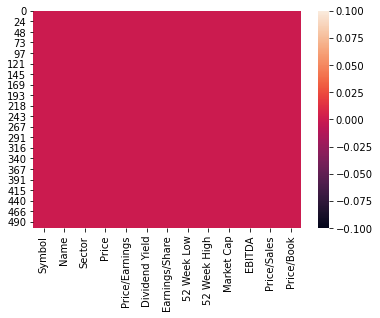

In [11]:
sns.heatmap(data.isna())

In [48]:
data.duplicated().sum()

0

In [209]:
data.describe().style.highlight_max()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week_High,52 Week_Low,Market Cap,EBITDA,Price/Sales,Price/Book
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,104.106505,24.654303,1.901477,3.815192,122.985808,83.812053,49376646816.472725,3576405636.027111,3.953316,14.498687
std,135.372594,40.767081,1.541039,5.529133,156.480433,106.497350,90691616349.663116,6880742483.653754,3.485055,89.838923
min,2.820000,-251.530000,0.000000,-24.620000,6.590000,2.800000,2626102121.000000,-5067000000.000000,0.153186,0.510000
25%,46.355000,15.350000,0.795585,1.525000,56.350000,38.520000,12749569942.000000,770898000.000000,1.631733,2.020000
50%,73.920000,19.450000,1.790190,2.890000,86.680000,62.850000,21433781860.000000,1613000000.000000,2.880285,3.400000
75%,116.735000,25.770000,2.797169,5.120000,140.315000,96.610000,44993152685.000000,3657500000.000000,4.728857,6.130000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,809508034020.000000,79386000000.000000,20.094294,1403.380000


## Data Visualization

#####  1.This graph shows the share price of each companies. 
     This graph clearly shows that PCLN has the highest share price.

In [49]:
data.iplot(x='Symbol',y='Price',mode='markers',size=5,color='blue',
          xTitle='Company name',
          yTitle='Price',
          title='Share price of companies')

# highlight the maximum

#### 2. This graph shows the market capacity of companies. 
     Market capacity is the market value of a company’s shares (calculated as share price x number of shares)
     It shows the company AAPL has the highest market value.

In [205]:
sy_mkt=pd.DataFrame([data['Symbol'],data['Market Cap']]).T
sy_mkt.sort_values(by='Market Cap',inplace=True)

In [208]:
sy_mkt.iplot(x='Symbol',y='Market Cap',kind='barh',size=5,
          xTitle='Company name',
          yTitle='Price',
          title='Share price of companies',color='red')


#### 3.This graph shows the EBITDA of companies.
    EBITDA means  A company’s earnings before interest, taxes, depreciation, and amortization; often used as a proxy for its profitability. We can see that the highest earnings is for AAPL and few companies have negative earnings also.

In [196]:
sy_ebitda=pd.DataFrame([data['Symbol'],data['EBITDA']]).T
sy_ebitda.sort_values(by='EBITDA',inplace=True)

valu=pd.concat([sy_ebitda.head(20),sy_ebitda.tail(20)])

In [199]:
valu.iplot(x='Symbol',y='EBITDA',kind='bar',size=5,
          xTitle='Company name',
          yTitle='Earning of companies',
          title='Earning of companies- Top 20 and Bottom 20',color='purple',sortbars=True)
# select top 10 and bottom 10

#### 4. This graph shows the earning per share of companies.
    Earning per share is  A company’s profit divided by the number of shares of its stock. 
    The highest earning per share is for AZO and the lowest is for BHF

In [194]:
sy_ear=pd.DataFrame([data['Symbol'],data['Earnings/Share']]).T
sy_ear.sort_values(by='Earnings/Share',inplace=True)
#val=sy_ear.loc[]
#val
val=pd.concat([sy_ear.head(20),sy_ear.tail(20)])


In [189]:
val.iplot(x='Symbol',y='Earnings/Share',kind='bar',color='green',
          xTitle='Symbol',yTitle='Earnings per share',
          title='Earning per share of companies, Lower and Higher')


#### 5. Evaluating the sector wise market capacity.
 - This graph shows that the market capacity is more for IT sector 

In [131]:
mkt=pd.Series(data.groupby('Sector')['Market Cap'].sum()).sort_values(ascending=False)
mkt

Sector
Information Technology        6.727122e+12
Financials                    3.442649e+12
Health Care                   3.197584e+12
Consumer Discretionary        3.193496e+12
Industrials                   2.282663e+12
Consumer Staples              1.925663e+12
Energy                        1.289971e+12
Materials                     6.923003e+11
Real Estate                   6.253157e+11
Utilities                     6.116326e+11
Telecommunication Services    4.530427e+11
Name: Market Cap, dtype: float64

In [134]:
fig1=px.bar(mkt,
      title='Sector wise Market price evaluation',color=mkt.values);
fig1
# highlight the max

#### 6. Evaluating the sector wise average share price.
 - This graph shows that the average share price is more in Health care sector

In [338]:
mn=data.groupby('Sector')['Price'].mean()
mn

Sector
Consumer Discretionary        125.904512
Consumer Staples               78.843333
Energy                         58.941667
Financials                     89.056029
Health Care                   133.950000
Industrials                   115.611875
Information Technology        119.242857
Materials                     102.386800
Real Estate                    88.712727
Telecommunication Services     33.603333
Utilities                      55.194643
Name: Price, dtype: float64

In [363]:
fig=px.bar(data.groupby('Sector')['Price'].mean(),
      title='Sector wise share price evaluation',
           text=mn.values.round(2),
           color=mn.values,color_continuous_scale='mint')

fig.update_traces( textposition='outside')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show();

#### 7. Sector wise average annual highest and lowest share price


In [349]:
c=data.groupby('Sector')[['52 Week_Low','52 Week_High']].mean()
c.reset_index(inplace=True)
c.style.highlight_max().highlight_min()


,Sector,52 Week_Low,52 Week_High
0,Consumer Discretionary,97.642056,148.947194
1,Consumer Staples,67.843364,91.932961
2,Energy,49.092317,74.175333
3,Financials,72.694468,101.821849
4,Health Care,104.949397,162.771197
5,Industrials,89.992900,133.144139
6,Information Technology,91.891416,138.778641
7,Materials,85.583248,118.038852
8,Real Estate,82.878088,110.550455
9,Telecommunication Services,29.503667,41.693333


In [381]:
#data.groupby('Sector')[['52 Week_Low','52 Week_High']].mean().iplot(mode='lines+markers',size=5,
                                                                   #xTitle='Sector',
                                                                   #yTitle='Lowest and Highest share price in a year',
                                                                   #title='Sector wise average Highest and Lowest share price',)

In [380]:
f_l=px.line(c,x='Sector',y=['52 Week_Low','52 Week_High'],
           )
f_l.add_annotation(x='Health Care', y=104,
            text="Highest",
            showarrow=True,
            arrowhead=1)
f_l.add_annotation(x='Health Care', y=162,
            text="Highest",
            showarrow=True,
            yshift=10)

f_l.update_layout(showlegend=True)

f_l.show();
            

#### 8. This graph shows company wise high and low share price in a year

In [17]:
import plotly.graph_objects as pg

In [18]:
x = data['Symbol']
  
plot = pg.Figure(data=[go.Line(
    name='52 Week_Low',
    x=x,
    y=data['52 Week_Low']
),
    go.Line(
    name='52 Week_High',
    x=x,
    y=data['52 Week_High']
)
])
  
  
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Both"}]),
                dict(label="52 Week_Low",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "52 Week_Low",
                            }]),
                dict(label="52 Week_High",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "52 Week_High",
                            }]),
            ]),
        )
    ])
  
plot.show()


C:\Users\BY\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




#### 9. Dividend yield of companies.
 
   Dividend yield is the ratio of the annual dividends per share divided by the price per share.
   We can see that dividend yield is high for CTL.



In [83]:
from plotly.subplots import make_subplots

sp=make_subplots()

In [59]:
fig5 = px.scatter(data, x="Symbol", y="Dividend Yield",
         size="Dividend Yield", color="Sector",
                 hover_name="Symbol", size_max=25)
fig5.show()

In [28]:
#data.iplot(x='Symbol',y='Dividend Yield')

#### 10. Sector wise Dividend yield.

In [321]:
D_y=pd.DataFrame(data.groupby('Sector')['Dividend Yield'].mean()).sort_values(by='Dividend Yield',ascending=False)
D_y.reset_index(inplace=True)
D_y.style.bar()

,Sector,Dividend Yield
0,Telecommunication Services,7.567797
1,Real Estate,3.894758
2,Utilities,3.759224
3,Consumer Staples,2.421160
4,Financials,2.017241
5,Energy,1.960985
6,Materials,1.737976
7,Consumer Discretionary,1.579266
8,Industrials,1.501569
9,Information Technology,1.228494


In [322]:
fig4=px.bar(D_y,x='Sector',y='Dividend Yield',
            color='Dividend Yield',
      title='Sector wise Dividend yield');
fig4

In [108]:
data.Sector.value_counts()

Consumer Discretionary        82
Information Technology        70
Financials                    68
Industrials                   64
Health Care                   59
Consumer Staples              33
Real Estate                   33
Energy                        30
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

In [134]:
m=pd.DataFrame(data.groupby(['Sector','Symbol'])['Price'].sum())

In [140]:
m

Price
Sector                 Symbol         
Consumer Discretionary AAP      109.63
                       AMZN    1350.50
                       APTV      89.27
                       AZO      718.57
                       BBY       68.79
...                                ...
Utilities              SCG       35.60
                       SO        43.40
                       SRE      103.36
                       WEC       59.50
                       XEL       42.44

[495 rows x 1 columns]

#### 11. Share price of companies 

In [299]:
data.iplot(x='Symbol',y='Price',mode='markers',categories='Sector',
          xTitle='Symbol',
          yTitle='Price',
           size=4,
          title='Share price of companies',
          );

C:\Users\BY\anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\BY\anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [298]:
f=px.scatter(data,x='Symbol',y='Price',animation_frame=data.Sector,
           animation_group='Symbol',
          color='Sector',hover_name='Name',size='Market Cap',size_max=30)

f.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 3000
f.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 3500

f